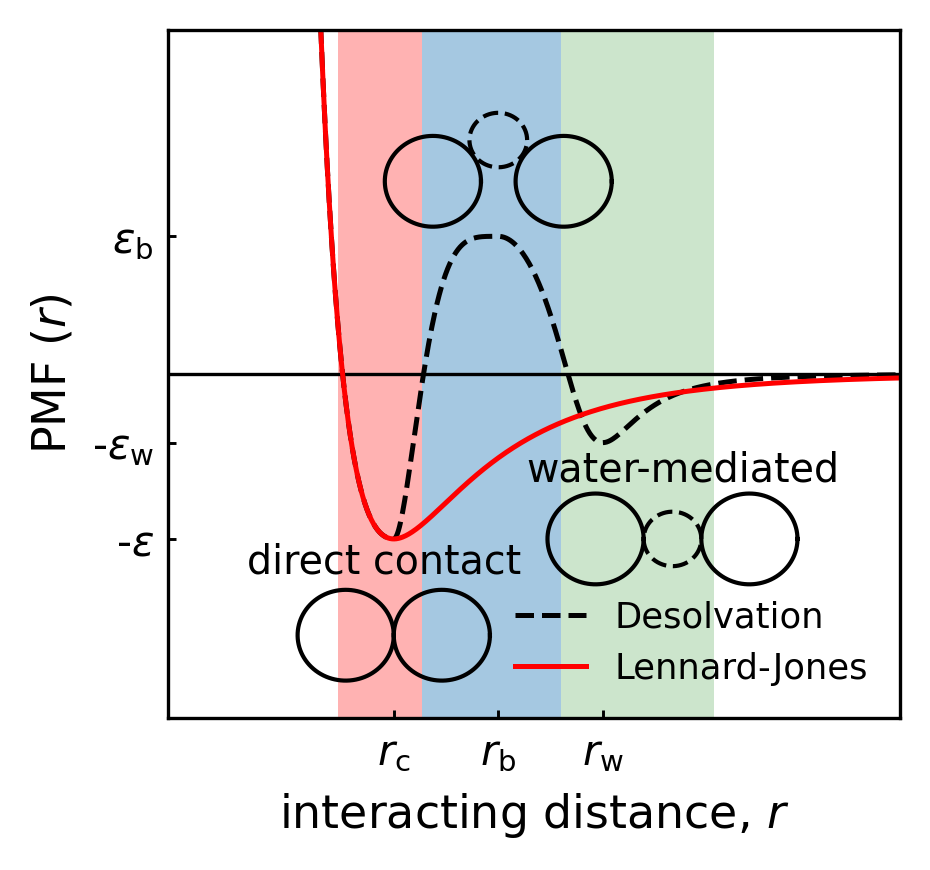

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def z(r,rcm):
    return (rcm/r)**6

def y(r,rdb):
    return (r-rdb)**2

def chan(r,e,essm,edb):
    sigma=0.6; rcm=2**(1./6)*sigma; rssm=rcm+0.3; rdb=rcm+0.15
    n=2; m=3
    c=4*n*(e+edb)/(rdb-rcm)**(4*n)
    b=m*essm*(rssm-rdb)**(2*(m-1))
    h1=(1-1/m)*(rssm-rdb)**2/(essm/edb+1)
    h2=(m-1)*(rssm-rdb)**(2*m)/(1+edb/essm)      
    res=r.copy()
    list1=np.where(r<rcm)[0]
    list2=np.where( (r>=rcm)&(r<rdb)) [0]
    list3=np.where(r>=rdb)[0]
    res[list1]=e*z(r[list1],rcm)*(z(r[list1],rcm)-2)
    res[list2]=c*y(r[list2],rdb)**n* (y(r[list2],rdb)**n/2-(rdb-rcm)**(2*n) )/2/n+edb
    res[list3]=-b*(y(r[list3],rdb)-h1)/(y(r[list3],rdb)**m+h2)
    return res

def lj(r,epsilon,sigma):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

def hps(r,epsilon,sigma,ll):
    cutoff=2**(1./6)*sigma
    list1=np.where(r<cutoff)[0]
    list2=np.where(r>=cutoff)[0]
    res=r.copy()
    res[list1]=lj(r[list1],epsilon,sigma)+(1-ll)*epsilon
    res[list2]=ll*lj(r[list2],epsilon,sigma)
    return res

r=np.linspace(0.5,2.0,1000)
eh=0.2 #kcal/mol
edb=0.1
sigma=0.6 #nm
ll=0.6 #lambda
e=0.12
essm=0.05
rcm=2**(1./6.)*sigma
rdb=rcm+0.15
rssm=rcm+0.30

x_ticks = [rcm, rdb, rssm]
x_values = [r'$r_{\mathregular{c}}$', r'$r_{\mathregular{b}}$', r'$r_{\mathregular{w}}$']
y_ticks = [edb, -essm, -e]
y_values = [r'$\varepsilon_{\mathregular{b}}$', r'-$\varepsilon_{\mathregular{w}}$', r'-$\varepsilon$']

fig,ax=plt.subplots(1,1,figsize=[3.2,3.],facecolor='w',dpi=300,sharex=True,sharey=True)
ax.axhline(y=0, color='k', linewidth=0.8)
ax.plot(r,chan(r,e,essm,edb),'--',color='k',linewidth=1.2, label='Desolvation')
ax.plot(r,lj(r,e,sigma),'-',color='r',linewidth=1.2, label='Lennard-Jones')

rx = 0.046*3/2
ry = 0.022*3/2
rwx = rx*0.6
rwy = ry*0.6
theta = np.linspace(0, 2 * np.pi, 200)

## native contact
nc_1x = rcm+rx*np.cos(theta)-rx
nc_1y = ry*np.sin(theta)-e-0.07
nc_2x = rcm+rx*np.cos(theta)+rx
nc_2y = ry*np.sin(theta)-e-0.07
ax.plot(nc_1x, nc_1y, color='k', linewidth=1)
ax.plot(nc_2x, nc_2y, color='k', linewidth=1)

## pseudo contact
pc_1x = rssm+rx*np.cos(theta)-rx-rwx+0.1
pc_1y = ry*np.sin(theta)-e
pc_2x = rssm+rx*np.cos(theta)+rx+rwx+0.1
pc_2y = ry*np.sin(theta)-e
pc_3x = rssm+rwx*np.cos(theta)+0.1
pc_3y = rwy*np.sin(theta)-e
ax.plot(pc_1x, pc_1y, color='k', linewidth=1)
ax.plot(pc_2x, pc_2y, color='k', linewidth=1)
ax.plot(pc_3x, pc_3y, color='k', ls='--', linewidth=1)

## middle state
ms_1x = rdb+rx*np.cos(theta)-rx-rwx*0.6
ms_1y = ry*np.sin(theta)+edb+0.04
ms_2x = rdb+rx*np.cos(theta)+rx+rwx*0.6
ms_2y = ry*np.sin(theta)+edb+0.04
ms_3x = rdb+rwx*np.cos(theta)
ms_3y = rwy*np.sin(theta)+edb+0.07
ax.plot(ms_1x, ms_1y, color='k', linewidth=1)
ax.plot(ms_2x, ms_2y, color='k', linewidth=1)
ax.plot(ms_3x, ms_3y, color='k', ls='--', linewidth=1)

ax.text(rcm-0.21, -e-0.025, 'direct contact', fontsize=9.5)
ax.text(rssm-0.11, -essm-0.028, 'water-mediated', fontsize=9.5)

plt.fill_between([rcm-0.08, rcm+0.04], [-10, -10], [10, 10], color='r', alpha=0.3, edgecolors='none')
plt.fill_between([rcm+0.04, rssm-0.06], [-10, -10], [10, 10], color='C0', alpha=0.4, edgecolors='none')
plt.fill_between([rssm-0.06, rssm+0.16], [-10, -10], [10, 10], color='g', alpha=0.2, edgecolors='none')

ax.tick_params(labelsize=10, direction='in', length=2, width=0.7)
plt.xticks(x_ticks, x_values)
plt.yticks(y_ticks, y_values)
plt.xlim([0.35,1.40])
plt.ylim([-0.25,0.25])
plt.legend(fontsize=8.5, frameon=False)
plt.xlabel(r'interacting distance, $r$', fontsize=11)
plt.ylabel(r'PMF ($r$)', fontsize=11)
plt.tight_layout()
plt.savefig(f"../../figures/water-pmf/desolvation.svg", format="svg", bbox_inches='tight')
plt.show()

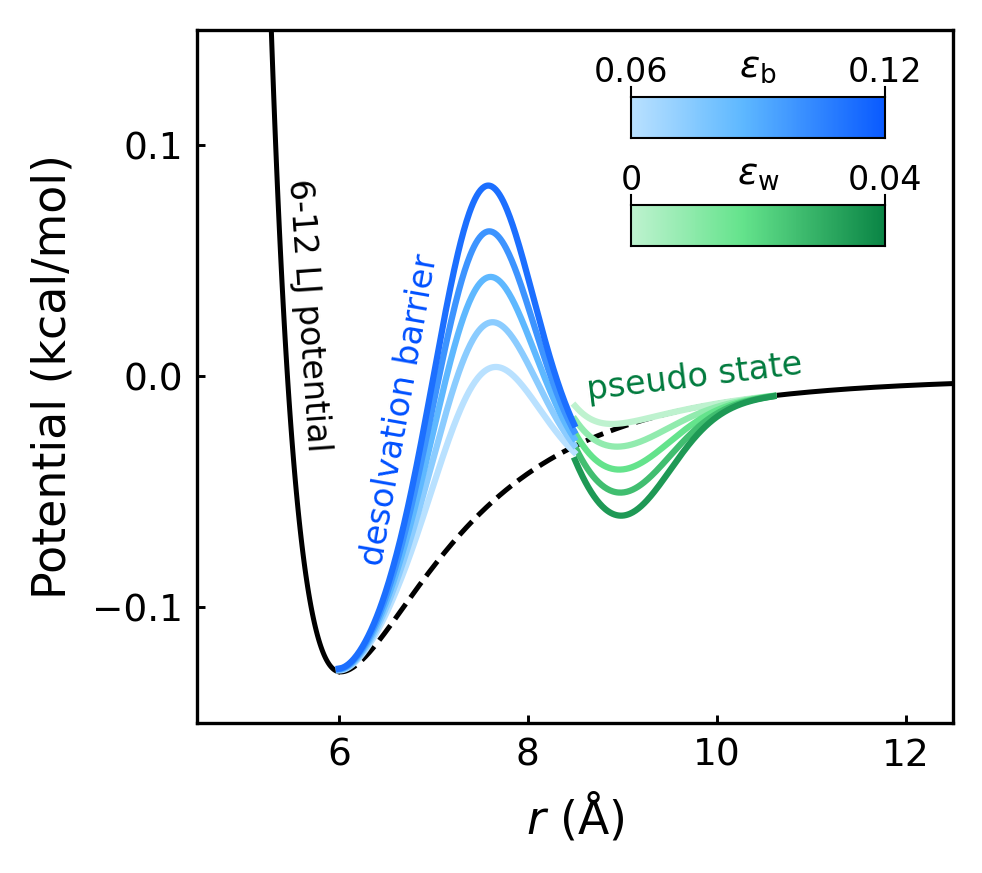

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap, Normalize

def lj(r,epsilon,sigma):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)

def hps(r,epsilon,sigma,ll):
    cutoff=2**(1./6)*sigma
    list1=np.where(r<cutoff)[0]
    list2=np.where(r>=cutoff)[0]
    res=r.copy()
    res[list1]=lj(r[list1],epsilon,sigma)+(1-ll)*epsilon
    res[list2]=ll*lj(r[list2],epsilon,sigma)
    return res

def hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w):
	lj_potential = 4 * e_h * ((sigma / r)**12 - (sigma / r)**6)
	lj_potential_diff = 24 * e_h / r * (2 * (sigma / r)**12 - (sigma / r)**6)
	if r <= 2**(1.0 / 6.0) * sigma:
		V = lj_potential + (1 - lam) * e_h\
          + e_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * np.exp(-(r-r_w)**2 / var_w)
		F = lj_potential_diff\
          + e_b * 2 * (r-r_b) / var_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * 2 * (r-r_w) / var_w * np.exp(-(r-r_w)**2 / var_w)
	else:
		V = lam * lj_potential\
          + e_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * np.exp(-(r-r_w)**2 / var_w)
		F = lam * lj_potential_diff\
          + e_b * 2 * (r-r_b) / var_b * np.exp(-(r-r_b)**2 / var_b)\
          - e_w * 2 * (r-r_w) / var_w * np.exp(-(r-r_w)**2 / var_w)
	return V

lam = 0.640
sigma = 0.536
r_m = 2**(1. / 6.) * sigma
r_b = r_m + 0.15
r_w = r_m + 0.30
var_b, var_w = 0.005, 0.005

fig, ax = plt.subplots(1, 1, figsize=[3.25, 3], facecolor='w', dpi=300)

R1 = np.arange(0.5, 0.6, 0.001)
plt.plot(R1*10, hps(R1, 0.2, sigma, lam), color='k', ls='-', lw=1.2)
R2 = np.arange(0.6, 1.06, 0.001)
plt.plot(R2*10, hps(R2, 0.2, sigma, lam), color='k', ls='--', lw=1.2)
R3 = np.arange(1.06, 2, 0.001)
plt.plot(R3*10, hps(R3, 0.2, sigma, lam), color='k', ls='-', lw=1.2)

## Fix e_b
cmap_green = LinearSegmentedColormap.from_list("bright_green", ["#E4F9EC", "#64E38C", "#007A3D"], N=256)
ew_list = np.arange(0.00, 0.05, 0.01)
clist_green = cmap_green(np.linspace(0.15, 0.85, len(ew_list)))
e_b = 0.12
e_h = 0.20

R_w = np.arange(0.85, 1.06, 0.001)
for i, e_w in enumerate(ew_list):
    V = []
    for r in R_w:
        V.append(hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w))
    plt.plot(R_w*10, V, color=clist_green[i], lw=1.5, alpha=1)

## Fix e_w
cmap_blue = LinearSegmentedColormap.from_list("bright_blue", ["#E0F2FF", "#5EB8FF", "#0050FF"], N=256)
eb_list = np.arange(0.06, 0.16, 0.02)
clist_blue = cmap_blue(np.linspace(0.15, 0.85, len(eb_list)))
e_h = 0.20
e_w = 0.02

R_b = np.arange(0.6, 0.85, 0.001)
for i, e_b in enumerate(eb_list):
    V = []
    for r in R_b:
        V.append(hps_desolvation(r, r_b, r_w, var_b, var_w, lam, sigma, e_h, e_b, e_w))
    plt.plot(R_b*10, V, color=clist_blue[i], lw=1.5, alpha=1)

plt.xlim(4.5, 12.5)
plt.ylim(-0.15, 0.15)
plt.xlabel(r'$r$ ($\mathregular{\AA}$)', fontsize=11)
plt.ylabel('Potential (kcal/mol)', fontsize=11)
plt.tick_params(labelsize=9, direction='in', length=2, width=0.7)
plt.yticks([-0.1, 0, 0.1])

plt.text(5.4, -0.03, '6-12 LJ potential', rotation=-86, fontsize=8)
plt.text(6.18, -0.08, 'desolvation barrier', rotation=80, fontsize=8, color='#0050FF')
plt.text(8.6, -0.01, 'pseudo state', rotation=7, fontsize=8, color='#007A3D')

cbar_ax = fig.add_axes([0.57, 0.76, 0.26, 0.045])
cmap_partial = mpl.colors.ListedColormap(cmap_blue(np.linspace(0.15, 0.95, 256)))
norm = Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmap_partial, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')
tick_positions = [0, 1]
for x in tick_positions:
    cbar_ax.plot([x, x], [1, 1.25], color='black', lw=0.5, transform=cbar_ax.transAxes, clip_on=False)
cbar_ax.text(0, 1.2, '0.06', ha='center', va='bottom', fontsize=8, transform=cbar_ax.transAxes)
cbar_ax.text(1, 1.2, '0.12', ha='center', va='bottom', fontsize=8, transform=cbar_ax.transAxes)
cbar_ax.text(0.5, 1.3, r'$\epsilon_\mathregular{b}$', ha='center', va='bottom', fontsize=9, transform=cbar_ax.transAxes)
cbar.outline.set_visible(False)
cbar.set_ticks([])

cbar_ax = fig.add_axes([0.57, 0.64, 0.26, 0.045])
cmap_partial = mpl.colors.ListedColormap(cmap_green(np.linspace(0.15, 0.95, 256)))
norm = Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap=cmap_partial, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
for spine in cbar_ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_edgecolor('black')
tick_positions = [0, 1]
for x in tick_positions:
    cbar_ax.plot([x, x], [1, 1.25], color='black', lw=0.5, transform=cbar_ax.transAxes, clip_on=False)
cbar_ax.text(0, 1.2, '0', ha='center', va='bottom', fontsize=8, transform=cbar_ax.transAxes)
cbar_ax.text(1, 1.2, '0.04', ha='center', va='bottom', fontsize=8, transform=cbar_ax.transAxes)
cbar_ax.text(0.5, 1.3, r'$\epsilon_\mathregular{w}$', ha='center', va='bottom', fontsize=9, transform=cbar_ax.transAxes)
cbar.outline.set_visible(False)
cbar.set_ticks([])

plt.savefig(f"../../figures/water-pmf/energy.svg", format="svg", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1733735/3431125580.py:28: RuntimeWarning: divide by zero encountered in log
  plt.plot(spc_r*10, -8.314e-3*298.15*np.log(spc_g*10/9)/cal2j, color='#3366FF', label=r'water (1.0$\times$)', linewidth=1.5)
/tmp/ipykernel_1733735/3431125580.py:29: RuntimeWarning: divide by zero encountered in log
  plt.plot(spc09_r*10, -8.314e-3*298.15*np.log(spc09_g*10/9)/cal2j, color='#6699FF', label=r'0.9$\times$ polarity', linewidth=1.5)
/tmp/ipykernel_1733735/3431125580.py:30: RuntimeWarning: divide by zero encountered in log
  plt.plot(spc08_r*10, -8.314e-3*298.15*np.log(spc08_g*10/9)/cal2j, color='#99CCFF', label=r'0.8$\times$ polarity', linewidth=1.5)


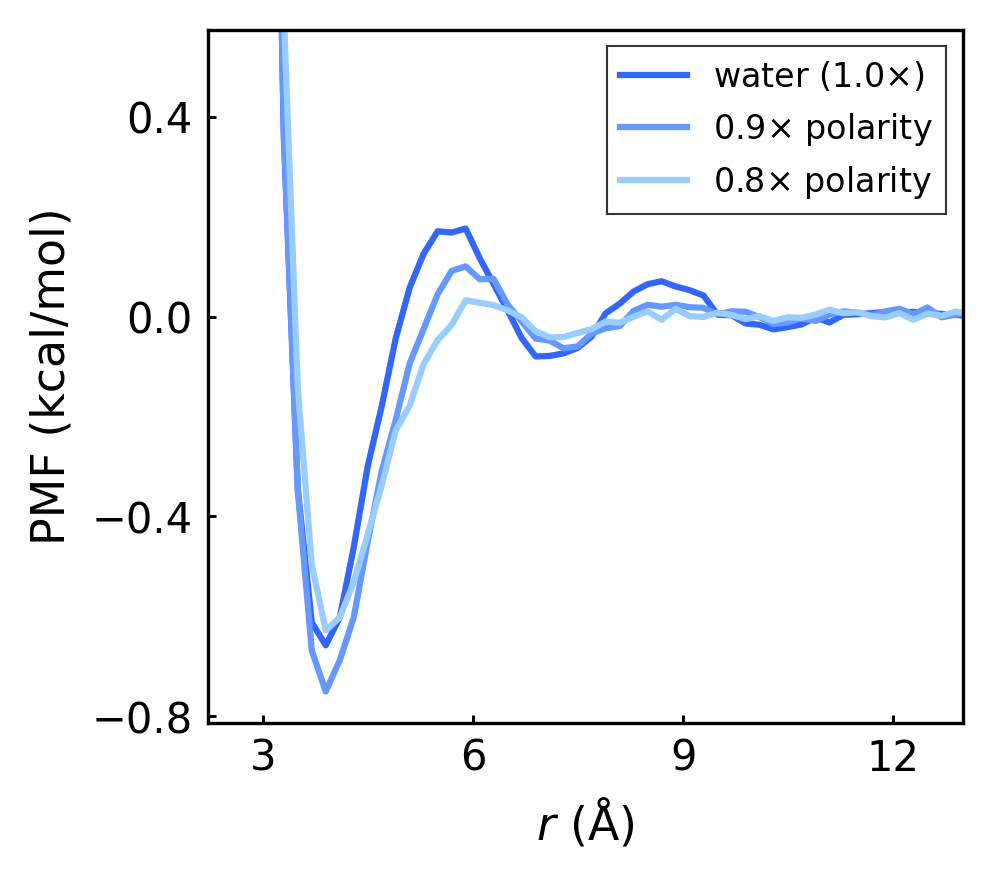

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def ave_by_n(array, n):
    nlen = len(array)
    result = np.zeros(int(nlen / n))
    for i in range(n):
        result += array[i:(nlen - nlen%n):n]
    result /= n
    return result

clist = cm.Blues(np.arange(0.99, 0.1, -0.8/4))

spc_r = ave_by_n(np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=0), 10)
spc_g = ave_by_n(np.loadtxt('../../pmf/CH4-CH4/rdf.xvg', skiprows=25, usecols=1), 10)

spc09_r = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.9/rdf.xvg', skiprows=25, usecols=0), 10)
spc09_g = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.9/rdf.xvg', skiprows=25, usecols=1), 10)

spc08_r = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.8/rdf.xvg', skiprows=25, usecols=0), 10)
spc08_g = ave_by_n(np.loadtxt('../../pmf/old_data/methane/multi_methane/tip4p0.8/rdf.xvg', skiprows=25, usecols=1), 10)

fig, ax = plt.subplots(1, 1, figsize=[3.25, 3], facecolor='w', dpi=300)

cal2j = 4.184 # 1 cal = 4.184 J

plt.plot(spc_r*10, -8.314e-3*298.15*np.log(spc_g*10/9)/cal2j, color='#3366FF', label=r'water (1.0$\times$)', linewidth=1.5)
plt.plot(spc09_r*10, -8.314e-3*298.15*np.log(spc09_g*10/9)/cal2j, color='#6699FF', label=r'0.9$\times$ polarity', linewidth=1.5)
plt.plot(spc08_r*10, -8.314e-3*298.15*np.log(spc08_g*10/9)/cal2j, color='#99CCFF', label=r'0.8$\times$ polarity', linewidth=1.5)
plt.xlabel(r'$r$ ($\mathregular{\AA}$)', fontsize=11)
plt.ylabel('PMF (kcal/mol)', fontsize=11)
plt.xlim(2.2, 13)
plt.ylim(-3.4/cal2j, 2.4/cal2j)
plt.tick_params(labelsize=10, direction='in', length=2, width=0.7)
plt.xticks(np.arange(3, 15, 3))
plt.yticks([-0.8, -0.4, 0, 0.4])
leg = plt.legend(fontsize=8, loc='upper right', frameon=True, fancybox=False, edgecolor="black")
leg.get_frame().set_linewidth(0.5)

plt.savefig(f"../../figures/water-pmf/aa_pmf.svg", format="svg", bbox_inches='tight')
plt.show()